# IMPORT THE PACKAGES NEEDED & DO SOME CONFIG

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prevent randomness, expecting the same result in every simulation
np.random.seed(42)
# Hide warning messages
import warnings
warnings.filterwarnings("ignore")

# READ THE DATASET

In [ ]:
# Read the train and tes dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv', header=None)

In [ ]:
# Show the train data
df_train.head()

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,Hsinchu,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,Hsinchu,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,Hsinchu,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,Hsinchu,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,Hsinchu,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4


In [ ]:
# Show the tes data
df_train.head()

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,Hsinchu,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,Hsinchu,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,Hsinchu,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,Hsinchu,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,Hsinchu,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4


In [ ]:
# Retrieve the information of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  4320 non-null   object
 1   Date      4320 non-null   object
 2   ItemName  4320 non-null   object
 3   0         4320 non-null   object
 4   1         4320 non-null   object
 5   2         4320 non-null   object
 6   3         4320 non-null   object
 7   4         4320 non-null   object
 8   5         4320 non-null   object
 9   6         4320 non-null   object
 10  7         4320 non-null   object
 11  8         4320 non-null   object
 12  9         4320 non-null   object
 13  10        4320 non-null   object
 14  11        4320 non-null   object
 15  12        4320 non-null   object
 16  13        4320 non-null   object
 17  14        4320 non-null   object
 18  15        4320 non-null   object
 19  16        4320 non-null   object
 20  17        4320 non-null   object
 21  18        4320

In [ ]:
# Retrieve the information of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4392 non-null   object
 1   1       4392 non-null   object
 2   2       4392 non-null   object
 3   3       4392 non-null   object
 4   4       4392 non-null   object
 5   5       4392 non-null   object
 6   6       4392 non-null   object
 7   7       4392 non-null   object
 8   8       4392 non-null   object
 9   9       4392 non-null   object
 10  10      4392 non-null   object
dtypes: object(11)
memory usage: 377.6+ KB


In [ ]:
# Show the descriptive statistics of the training dataset
df_train.describe(include="all")

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
count,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,...,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320
unique,1,240,18,691,662,655,655,632,644,651,...,682,700,706,705,712,711,726,711,721,719
top,Hsinchu,1/1 00:00,AMB_TEMP,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,4320,18,240,249,247,251,239,239,240,236,...,244,243,244,240,234,234,233,237,239,239


In [ ]:
# Show the descriptive statistics of the test dataset
df_test.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,10
count,4392,4392,4392,4392,4392,4392,4392,4392,4392,4392,4392
unique,244,18,723,707,700,688,682,679,691,703,711
top,index_0,AMB_TEMP,0,0,0,0,0,0,0,0,0
freq,18,244,243,238,247,241,236,232,230,233,236


# DATA MANIPULATION - TRAINING SET

In [ ]:
# From the describe function, we can see the Location column in the Training
# Dataset just contains 1 unique value, which is Hsinchu. So, we can drop it.
df_train_processed = df_train.drop('Location', axis=1)
df_train_processed.head()

,Date,ItemName,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,12.1,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,2.01,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,0.27,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,0.08,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,1.9,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4


In [ ]:
# Remove all white spaces from the dataframe
# Reference: https://www.geeksforgeeks.org/pandas/pandas-strip-whitespace-from-entire-dataframe/
for i in df_train_processed.columns:
    if df_train_processed[i].dtype == 'object':
        df_train_processed[i] = df_train_processed[i].map(str.strip)

# Sum all the invalid values
df_train_before_invalid = df_train_processed.isin(['#', '*', 'x', 'A']).sum().sum()
print("Sum of the invalid values before replacing phase:", df_train_before_invalid)

Sum of the invalid values before replacing phase: 1307


In [ ]:
# Replace the invalid values (#, *, x, A) with NaN
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
df_train_processed = df_train_processed.replace(['#', '*', 'x', 'A'], np.nan)

# Sum all the invalid values
df_train_after_invalid = df_train_processed.isin(['#', '*', 'x', 'A']).sum().sum()
print("Sum of the invalid values after replacing phase:", df_train_after_invalid)

Sum of the invalid values after replacing phase: 0


In [ ]:
# Retrieve the information of the preprocessed training dataset
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4320 non-null   object
 1   ItemName  4320 non-null   object
 2   0         4291 non-null   object
 3   1         4275 non-null   object
 4   2         4274 non-null   object
 5   3         4292 non-null   object
 6   4         4281 non-null   object
 7   5         4290 non-null   object
 8   6         4297 non-null   object
 9   7         4297 non-null   object
 10  8         4286 non-null   object
 11  9         4287 non-null   object
 12  10        4215 non-null   object
 13  11        4122 non-null   object
 14  12        4149 non-null   object
 15  13        4200 non-null   object
 16  14        4220 non-null   object
 17  15        4247 non-null   object
 18  16        4290 non-null   object
 19  17        4298 non-null   object
 20  18        4297 non-null   object
 21  19        4298

In [ ]:
# Change the dtype into float
# Reference: https://www.geeksforgeeks.org/python/python-pandas-to_numeric-method/
for i in df_train_processed.columns[2:]:
    df_train_processed[i] = pd.to_numeric(df_train_processed[i], errors='coerce')

df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4320 non-null   object 
 1   ItemName  4320 non-null   object 
 2   0         4291 non-null   float64
 3   1         4275 non-null   float64
 4   2         4274 non-null   float64
 5   3         4292 non-null   float64
 6   4         4281 non-null   float64
 7   5         4290 non-null   float64
 8   6         4297 non-null   float64
 9   7         4297 non-null   float64
 10  8         4286 non-null   float64
 11  9         4287 non-null   float64
 12  10        4215 non-null   float64
 13  11        4122 non-null   float64
 14  12        4149 non-null   float64
 15  13        4200 non-null   float64
 16  14        4220 non-null   float64
 17  15        4247 non-null   float64
 18  16        4290 non-null   float64
 19  17        4298 non-null   float64
 20  18        4297 non-null   floa

In [ ]:
# Melting the dataset
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_train_melt = pd.melt(df_train_processed, id_vars=['Date', 'ItemName'],
                        value_vars=[str(i) for i in range(24)], var_name='Hour',
                        value_name='Value')

df_train_melt.head()

,Date,ItemName,Hour,Value
0,1/1 00:00,AMB_TEMP,0,11.10
1,1/1 00:00,CH4,0,2.01
2,1/1 00:00,CO,0,0.31
3,1/1 00:00,NMHC,0,0.10
4,1/1 00:00,NO,0,1.50


In [ ]:
# Remove the space and the rest after it from the 'Date' Column
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df_train_melt['Date'] = df_train_melt['Date'].str.replace(r'\s.*', '', regex=True)

# Make a new column 'DateTime'
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df_train_melt['DateTime'] = pd.to_datetime(df_train_melt['Date'] + ' ' + df_train_melt['Hour'] + ':00', format='%m/%d %H:%M')

# Change the default year (1990) to 2025
df_train_melt['DateTime'] = df_train_melt['DateTime'].apply(lambda x: x.replace(year=2025))

# Drop the unnecessary columns
df_train_melt = df_train_melt.drop(['Date', 'Hour'], axis=1)

df_train_melt.head()

,ItemName,Value,DateTime
0,AMB_TEMP,11.10,2025-01-01
1,CH4,2.01,2025-01-01
2,CO,0.31,2025-01-01
3,NMHC,0.10,2025-01-01
4,NO,1.50,2025-01-01


In [ ]:
# Pivot the dataframe
# Reference 1: https://pandas.pydata.org/docs/user_guide/reshaping.html
# Reference 2: https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function
df_train_pivot = df_train_melt.pivot(index='DateTime', columns='ItemName', values='Value')
df_train_pivot = df_train_pivot.reset_index().sort_values(by='DateTime', ascending=True)
df_train_pivot.head()

ItemName,DateTime,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2025-01-01 00:00:00,11.1,2.01,0.31,0.10,1.5,11.9,13.5,21.6,38.0,25.0,0.0,64.0,NaN,2.11,38.0,53.0,3.0,2.6
1,2025-01-01 01:00:00,11.2,1.99,0.28,0.10,1.4,10.4,11.9,25.1,29.0,24.0,0.0,65.0,2.1,2.09,41.0,46.0,3.4,2.4
2,2025-01-01 02:00:00,11.4,2.00,0.28,0.08,1.4,9.8,11.2,25.6,27.0,13.0,0.0,63.0,2.1,2.08,49.0,43.0,2.7,2.5
3,2025-01-01 03:00:00,11.5,2.02,0.33,0.09,1.5,12.1,13.7,22.4,24.0,14.0,0.0,63.0,1.8,2.11,54.0,54.0,3.0,2.5
4,2025-01-01 04:00:00,11.6,2.03,0.32,0.10,1.4,12.4,13.9,21.1,29.0,15.0,0.0,63.0,1.1,2.13,50.0,50.0,2.6,2.1


In [ ]:
# Check all of the NaN values
print("Sum of the NaN values before replacing phase:", df_train_pivot.isna().sum().sum())

Sum of the NaN values before replacing phase: 1307


In [ ]:
# Fill NaN values with median, because the dataset likely continuous numeric
# And might have outliers (will be proven in the next part)
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
for column in df_train_pivot.columns:
  # Skip the 'DateTime' column
  if column != 'DateTime':
    median = df_train_pivot[column].median()
    df_train_pivot[column] = df_train_pivot[column].fillna(median)

# Check all of the NaN values
print("Sum of the NaN values after replacing phase:", df_train_pivot.isna().sum().sum())

Sum of the NaN values after replacing phase: 0


# DATA MANIPULATION - TEST SET

In [ ]:
# Because the test dataset doesn't have any column header, add it
df_test_processed = df_test.copy()
df_test_processed.columns = ['Index', 'ItemName', 0, 1, 2, 3, 4, 5, 6, 7, 8]

df_test_processed.head()

,Index,ItemName,0,1,2,3,4,5,6,7,8
0,index_0,AMB_TEMP,18.2,17.8,17.5,17.5,17.7,18.1,18.2,18.7,20.3
1,index_0,CH4,2.41,2.61,2.65,2.87,2.25,2.24,2.45,2.59,2.24
2,index_0,CO,0.77,0.74,0.63,0.6,0.36,0.31,0.48,1.01,1.05
3,index_0,NMHC,0.29,0.34,0.34,0.37,0.18,0.15,0.24,0.43,0.35
4,index_0,NO,6.8,11.1,9.6,13.6,3.1,2.4,17.8,49.5,41.1


In [ ]:
# Remove all white spaces from the dataframe
# Reference: https://www.geeksforgeeks.org/pandas/pandas-strip-whitespace-from-entire-dataframe/
for i in df_test_processed.columns:
    if df_test_processed[i].dtype == 'object':
        df_test_processed[i] = df_test_processed[i].map(str.strip)

# Sum all the invalid values
df_test_before_invalid = df_test_processed.isin(['#', '*', 'x', 'A', 'WIND_DIR+D2070EC']).sum().sum()
print("Sum of the invalid values before replacing phase:", df_test_before_invalid)

Sum of the invalid values before replacing phase: 164


In [ ]:
# Replace the invalid values (#, *, x, A) with NaN
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
df_test_processed = df_test_processed.replace(['#', '*', 'x', 'A', 'WIND_DIR+D2070EC'], np.nan)

# Sum all the invalid values
df_test_after_invalid = df_test_processed.isin(['#', '*', 'x', 'A', 'WIND_DIR+D2070EC']).sum().sum()
print("Sum of the invalid values after replacing phase:", df_test_after_invalid)

Sum of the invalid values after replacing phase: 0


In [ ]:
# Retrieve the information of the preprocessed test dataset
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Index     4392 non-null   object
 1   ItemName  4392 non-null   object
 2   0         4365 non-null   object
 3   1         4375 non-null   object
 4   2         4378 non-null   object
 5   3         4375 non-null   object
 6   4         4373 non-null   object
 7   5         4370 non-null   object
 8   6         4380 non-null   object
 9   7         4376 non-null   object
 10  8         4372 non-null   object
dtypes: object(11)
memory usage: 377.6+ KB


In [ ]:
# Change the dtype into float
# Reference: https://www.geeksforgeeks.org/python/python-pandas-to_numeric-method/
for i in df_test_processed.columns[2:]:
    df_test_processed[i] = pd.to_numeric(df_test_processed[i], errors='coerce')

df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     4392 non-null   object 
 1   ItemName  4392 non-null   object 
 2   0         4365 non-null   float64
 3   1         4375 non-null   float64
 4   2         4378 non-null   float64
 5   3         4375 non-null   float64
 6   4         4373 non-null   float64
 7   5         4370 non-null   float64
 8   6         4380 non-null   float64
 9   7         4376 non-null   float64
 10  8         4372 non-null   float64
dtypes: float64(9), object(2)
memory usage: 377.6+ KB


In [ ]:
# Melting the dataset
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_test_melt = pd.melt(df_test_processed, id_vars=['Index', 'ItemName'],
                       var_name='Hour', value_name='Value')

df_test_melt.head()

,Index,ItemName,Hour,Value
0,index_0,AMB_TEMP,0,18.20
1,index_0,CH4,0,2.41
2,index_0,CO,0,0.77
3,index_0,NMHC,0,0.29
4,index_0,NO,0,6.80


In [ ]:
# Pivot the test dataframe
# Reference: https://pandas.pydata.org/docs/user_guide/reshaping.html
df_test_pivot = df_test_melt.pivot(index=['Index', 'Hour'], columns='ItemName', values='Value')
df_test_pivot = df_test_pivot.reset_index()

# Create temporary column 'IndexTemp' for sorting
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df_test_pivot['IndexTemp'] = df_test_pivot['Index'].str.replace('index_', '', regex=False).astype(int)

# Sort by numeric Index and Hour
df_test_pivot = df_test_pivot.sort_values(by=['IndexTemp', 'Hour'])

# Drop the helper column
df_test_pivot = df_test_pivot.drop(columns='IndexTemp')

df_test_pivot.head()

ItemName,Index,Hour,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,index_0,0,18.2,2.41,0.77,0.29,6.8,30.9,37.7,4.1,53.0,35.0,0.0,84.0,2.8,2.70,140.0,120.0,0.4,0.5
1,index_0,1,17.8,2.61,0.74,0.34,11.1,28.2,39.3,2.0,50.0,35.0,0.0,85.0,1.9,2.95,145.0,115.0,0.5,0.4
2,index_0,2,17.5,2.65,0.63,0.34,9.6,25.9,35.6,1.9,36.0,24.0,0.0,85.0,1.9,2.99,169.0,173.0,0.4,0.3
3,index_0,3,17.5,2.87,0.60,0.37,13.6,22.8,36.4,1.8,39.0,28.0,0.0,85.0,1.9,3.24,177.0,155.0,0.4,0.3
4,index_0,4,17.7,2.25,0.36,0.18,3.1,16.5,19.6,7.4,23.0,15.0,0.0,81.0,1.0,2.43,96.0,104.0,0.5,0.8


In [ ]:
# Check all of the NaN values
print("Sum of the NaN values before replacing phase:", df_test_pivot.isna().sum().sum())

Sum of the NaN values before replacing phase: 164


In [ ]:
# Fill NaN values with median, because the dataset likely continuous numeric
# And might have outliers (will be proven in the next part)
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
for column in df_test_pivot.columns:
  # Skip the 'DateTime' column
  if column != 'Index' and column != 'Hour':
    median = df_test_pivot[column].median()
    df_test_pivot[column] = df_test_pivot[column].fillna(median)

# Check all of the NaN values
print("Sum of the NaN values after replacing phase:", df_test_pivot.isna().sum().sum())

Sum of the NaN values after replacing phase: 0


# TRAINING DATA ANALYSIS & VISUALIZATION:

In [ ]:
# Count the outliers for each features
count_outliers = {}
for col in df_train_pivot.columns:
  # Cek if it's a DateTime column
  if col == 'DateTime':
      continue
  # Remove missing values
  series = df_train_pivot[col].dropna()
  # 1st Quartile
  Q1 = series.quantile(0.25)
  # 3rd Quartile
  Q3 = series.quantile(0.75)
  # Interquartile Range (IQR)
  IQR = Q3 - Q1

  # Lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Less or greater than lower bound
  under_lower = series < lower_bound
  above_upper = series > upper_bound

  # Combine both
  outliers = under_lower | above_upper

  # Count the outliers
  count_outlier = outliers.sum()
  count_outliers[col] = count_outlier

print("Outlier counts:", count_outliers)

Outlier counts: {'AMB_TEMP': np.int64(0), 'CH4': np.int64(445), 'CO': np.int64(293), 'NMHC': np.int64(366), 'NO': np.int64(567), 'NO2': np.int64(328), 'NOx': np.int64(408), 'O3': np.int64(66), 'PM10': np.int64(275), 'PM2.5': np.int64(251), 'RAINFALL': np.int64(247), 'RH': np.int64(7), 'SO2': np.int64(167), 'THC': np.int64(327), 'WD_HR': np.int64(0), 'WIND_DIREC': np.int64(0), 'WIND_SPEED': np.int64(35), 'WS_HR': np.int64(15)}


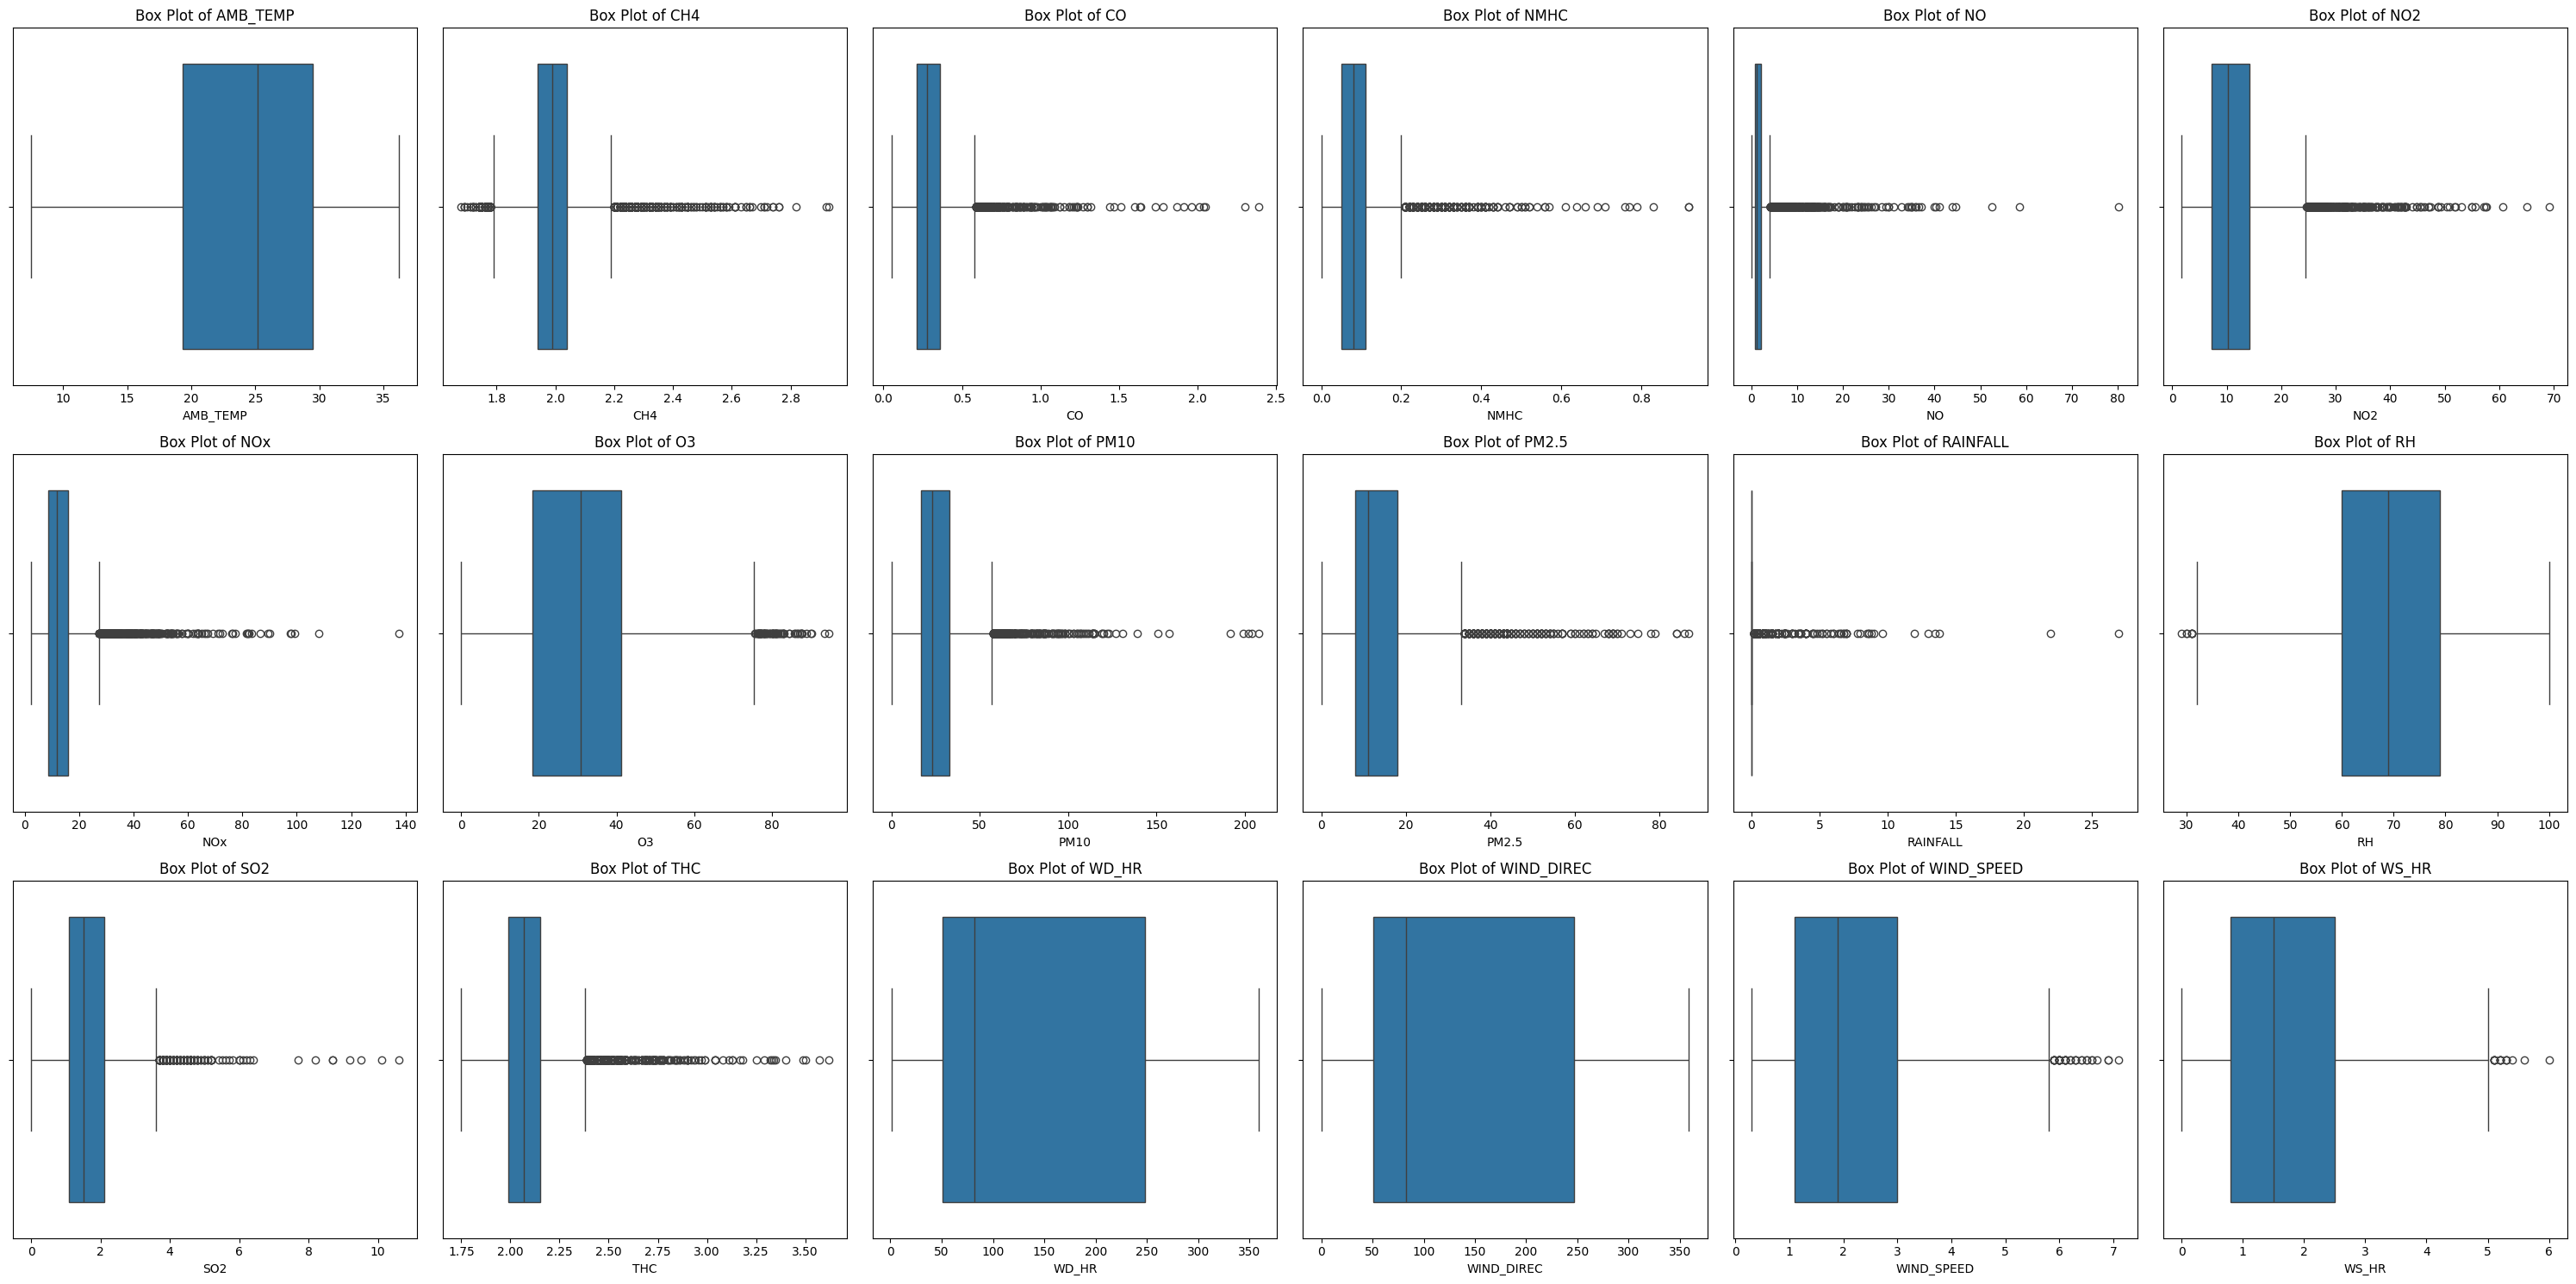

In [ ]:
# Obtain the numerical fields (columns) only
numerical_fields = []
for col in df_train_pivot.columns:
  if col != 'DateTime':
    numerical_fields.append(col)

plt.figure(figsize=(30, 15))

# Visualize the boxplot
for i, feature in enumerate(numerical_fields):
  plt.subplot(3, 6, i + 1)
  sns.boxplot(x=df_train_pivot[feature])
  plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Finding correlations with Pearson and Spearman method
# Reference: https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-corr/
pearson = df_train_pivot.corr(method='pearson')[ 'PM2.5' ].drop('PM2.5')
spearman = df_train_pivot.corr(method='spearman')[ 'PM2.5' ].drop('PM2.5')
print("Pearson correlation with PM2.5:", pearson)
print()
print("Spearman correlation with PM2.5:", spearman)

Pearson correlation with PM2.5: ItemName
DateTime     -0.231914
AMB_TEMP     -0.274504
CH4           0.438085
CO            0.602533
NMHC          0.510824
NO            0.234528
NO2           0.502703
NOx           0.465556
O3            0.102982
PM10          0.833422
RAINFALL     -0.081150
RH            0.073545
SO2           0.307916
THC           0.507966
WD_HR        -0.001018
WIND_DIREC    0.002836
WIND_SPEED   -0.130700
WS_HR        -0.147113
Name: PM2.5, dtype: float64

Spearman correlation with PM2.5: ItemName
DateTime     -0.177942
AMB_TEMP     -0.276276
CH4           0.445891
CO            0.613448
NMHC          0.460014
NO            0.109195
NO2           0.434926
NOx           0.408785
O3            0.151379
PM10          0.776236
RAINFALL     -0.136813
RH            0.018543
SO2           0.286094
THC           0.496105
WD_HR        -0.033840
WIND_DIREC   -0.022828
WIND_SPEED   -0.137763
WS_HR        -0.153632
Name: PM2.5, dtype: float64


<Figure size 1000x600 with 0 Axes>

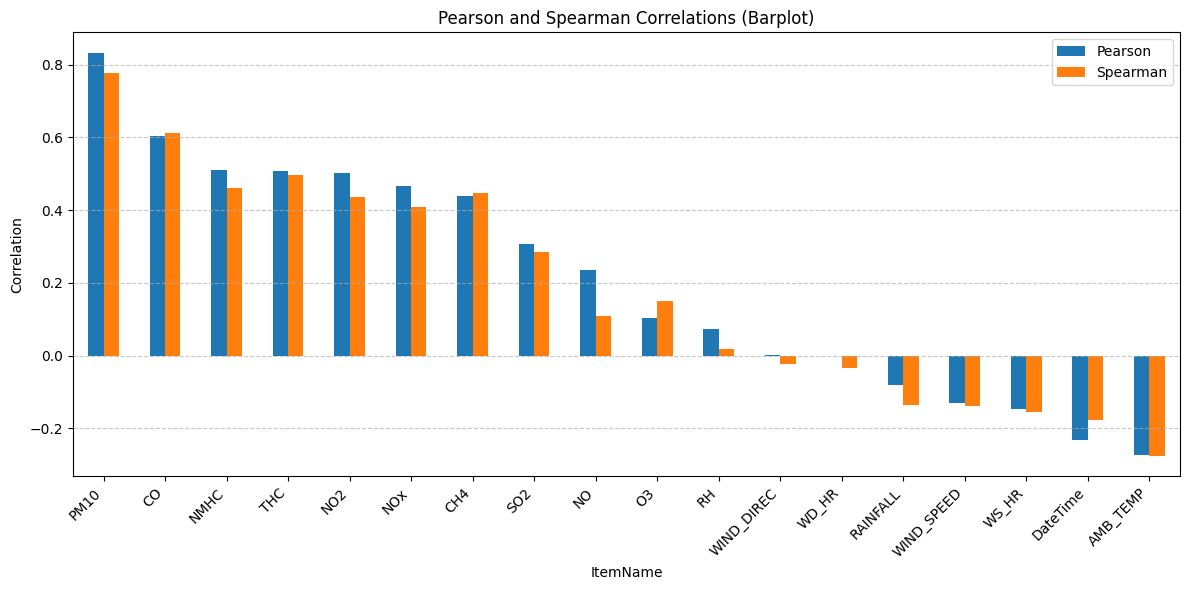

In [ ]:
# Combine correlations into a DataFrame for comparison
df_combined_correlations = pd.DataFrame({
    'Pearson': pearson,
    'Spearman': spearman
}).sort_values('Pearson', ascending=False)

# Plot the barplot, side by side
plt.figure(figsize=(10,6))
df_combined_correlations.plot(kind='bar', figsize=(12,6))
plt.title("Pearson and Spearman Correlations (Barplot)")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

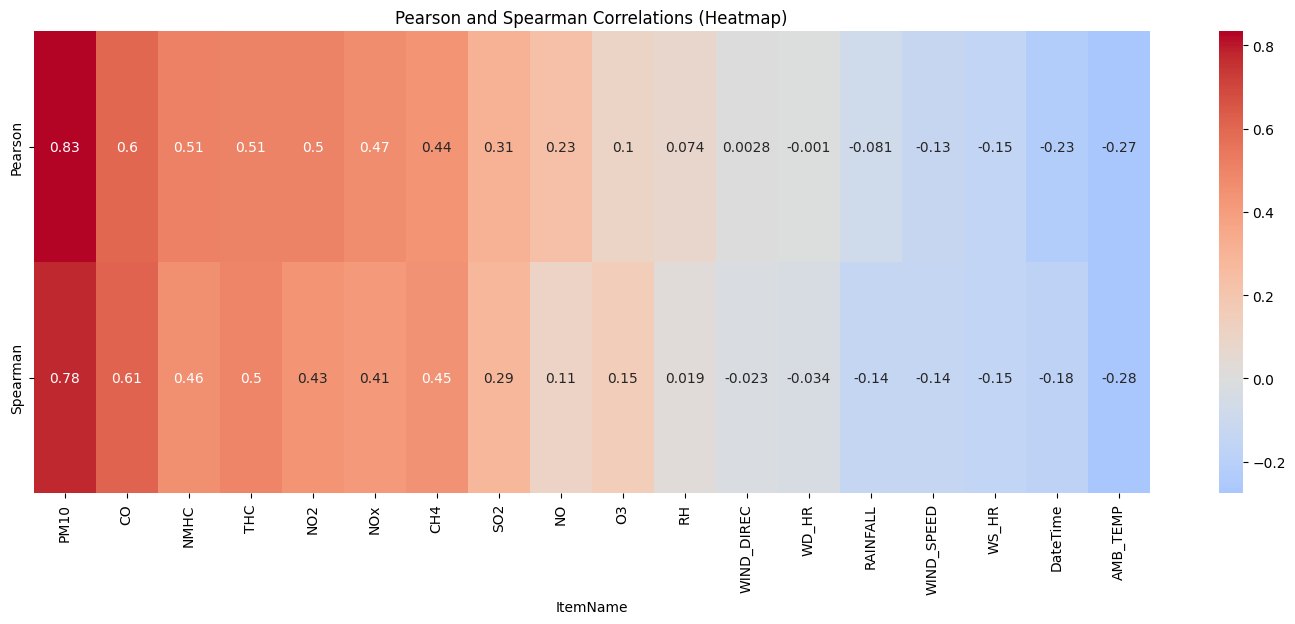

In [ ]:
# Now, display the correlations as heatmap
plt.figure(figsize=(18,6))
sns.heatmap(df_combined_correlations.T, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson and Spearman Correlations (Heatmap)")
plt.show()

In [ ]:
# Calculate Skewness and Kurtosis
# Reference: https://www.turing.com/kb/calculating-skewness-and-kurtosis-in-python
count_skew_kurt = {}
for col in numerical_fields:
  # Remove missing values
  series = df_train_pivot[col].dropna().values

  # Calculate mean & std
  mean = np.mean(series)
  std = np.std(series)

  # Calculate skewness, the formula is: the mean of ((x-mean)/std)^3
  skew = np.sum(((series - mean) / std) ** 3) / len(series)

  # Calculate kurtosis, the formula is: the mean of ((x-mean)/std)^4, substract 3 for excess kurtosis
  kurt = np.sum(((series - mean) / std) ** 4) / len(series) - 3

  # Add it to the set
  count_skew_kurt[col] = {'skewness': skew, 'kurtosis': kurt}

print("Skewness and Kurtosis:")
print()
# print(count_skew_kurt)
for col, kind in count_skew_kurt.items():
  skew_val = kind['skewness']
  kurt_val = kind['kurtosis']
  print(f"{col}:")
  print(f"Skewness: np.float64({skew_val}) - Kurtosis: np.float64({kurt_val})")
  print()

Skewness and Kurtosis:

AMB_TEMP:
Skewness: np.float64(-0.32671663196860234) - Kurtosis: np.float64(-0.8299311091279544)

CH4:
Skewness: np.float64(1.6159677167852367) - Kurtosis: np.float64(6.687696138994207)

CO:
Skewness: np.float64(3.602761947240666) - Kurtosis: np.float64(25.568379012258987)

NMHC:
Skewness: np.float64(3.081983240872543) - Kurtosis: np.float64(18.363016735434442)

NO:
Skewness: np.float64(7.487777707650279) - Kurtosis: np.float64(88.34545678464191)

NO2:
Skewness: np.float64(2.1560643728097064) - Kurtosis: np.float64(7.373393497368845)

NOx:
Skewness: np.float64(3.3875336215378775) - Kurtosis: np.float64(20.028752465022965)

O3:
Skewness: np.float64(0.452970997797892) - Kurtosis: np.float64(0.05349669577975513)

PM10:
Skewness: np.float64(2.7350477999826626) - Kurtosis: np.float64(15.879065397643117)

PM2.5:
Skewness: np.float64(2.1904797424850337) - Kurtosis: np.float64(7.909698331371548)

RAINFALL:
Skewness: np.float64(17.183804286297) - Kurtosis: np.float64(413

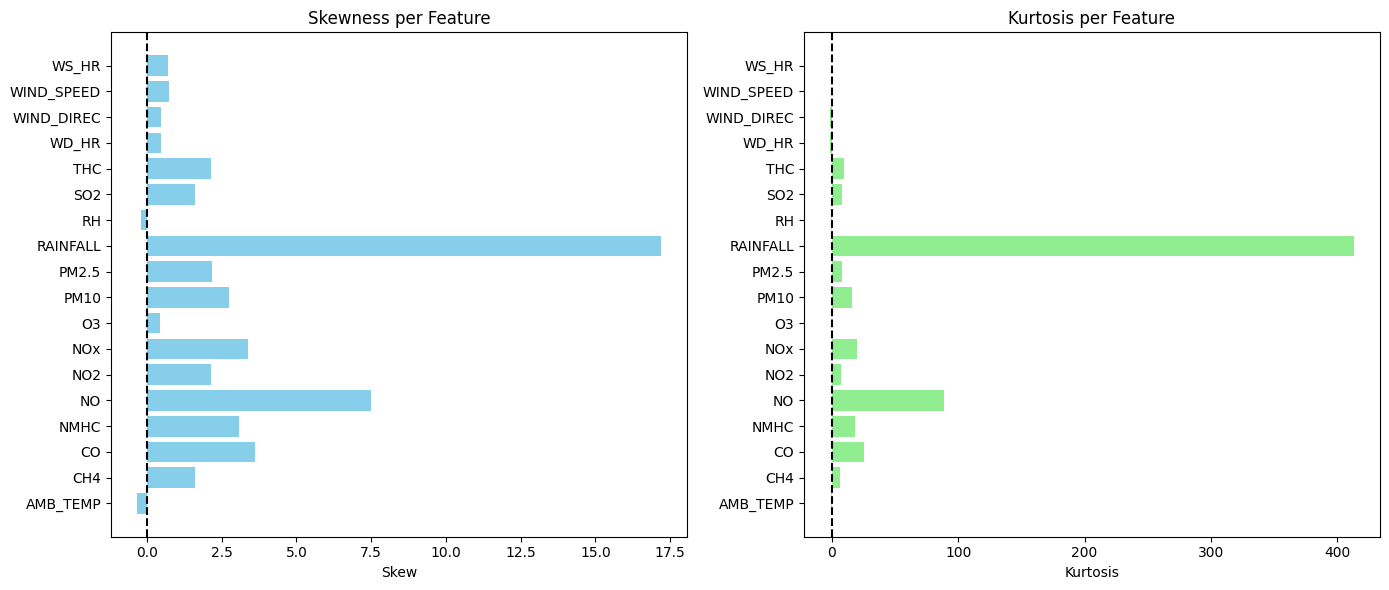

In [ ]:
# Plot the Skewness and Kurtosis
# Reference: https://www.geeksforgeeks.org/python/draw-a-horizontal-bar-chart-with-matplotlib/

list_skewness = []
list_kurtosis = []
list_features = []

# Iteration through each feature
for feature in count_skew_kurt.keys():
  list_skewness.append(count_skew_kurt[feature]['skewness'])
  list_kurtosis.append(count_skew_kurt[feature]['kurtosis'])
  list_features.append(feature)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Skewness for each feature
axes[0].barh(list_features, list_skewness, color='skyblue')
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title("Skewness per Feature")
axes[0].set_xlabel("Skew")

# Plot Kurtosis for each feature
axes[1].barh(list_features, list_kurtosis, color='lightgreen')
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title("Kurtosis per Feature")
axes[1].set_xlabel("Kurtosis")

plt.tight_layout()
plt.show()

In [ ]:
# Autocorrelation
# Reference: https://medium.com/%40amit25173/understanding-autocorrelation-in-pandas-7e48a833bf71
lags = [1, 6, 12, 24]
set_results = {}

# Iteration through each numerical feature
for col in numerical_fields:
  # Current feature, drop missing value
  data = df_train_pivot[col].dropna()

  # Calculate the autcorrelation for each lag
  list_autocorr = []
  for lag in lags:
      list_autocorr.append(data.autocorr(lag=lag))

  set_results[col] = list_autocorr

# Iterate through each feature to decide the selected feature(s)
selected_features = []
for feature, autocorrs in set_results.items():
  for autocorr in autocorrs:
    # Check if the autocorrelation is strong (absolute)
    if abs(autocorr) > 0.5:
      selected_features.append(feature)
      break

# Create new lagged features
for lag in lags:
  for feature in selected_features:
    df_train_pivot[f'{feature}_lag{lag}'] = df_train_pivot[feature].shift(lag)

# Print the autocorrelation value
print("Autocorrelation Results per Feature:")
for feature, autocorrs in set_results.items():
  print(f"{feature}: {autocorrs}")

print()

# Show the selected features
print("Selected Features:")
print(selected_features)

Autocorrelation Results per Feature:
AMB_TEMP: [np.float64(0.992737333153766), np.float64(0.8901879461582572), np.float64(0.8239399628534879), np.float64(0.9285975904040485)]
CH4: [np.float64(0.8846521842183338), np.float64(0.49451680138721965), np.float64(0.2492984473975953), np.float64(0.4863864787530149)]
CO: [np.float64(0.890393617035895), np.float64(0.39498809469859875), np.float64(0.5021177178004932), np.float64(0.4785579544320361)]
NMHC: [np.float64(0.8527195128563942), np.float64(0.33963399753193557), np.float64(0.33566838174644803), np.float64(0.3481270660388603)]
NO: [np.float64(0.7798770795893208), np.float64(0.1410939320447756), np.float64(0.28362139241668555), np.float64(0.24265523531340838)]
NO2: [np.float64(0.886878898139419), np.float64(0.35625148380832666), np.float64(0.38960139437053154), np.float64(0.4533656402968857)]
NOx: [np.float64(0.869561044138805), np.float64(0.32564773724142687), np.float64(0.4494544073084901), np.float64(0.3961098466179062)]
O3: [np.float64(

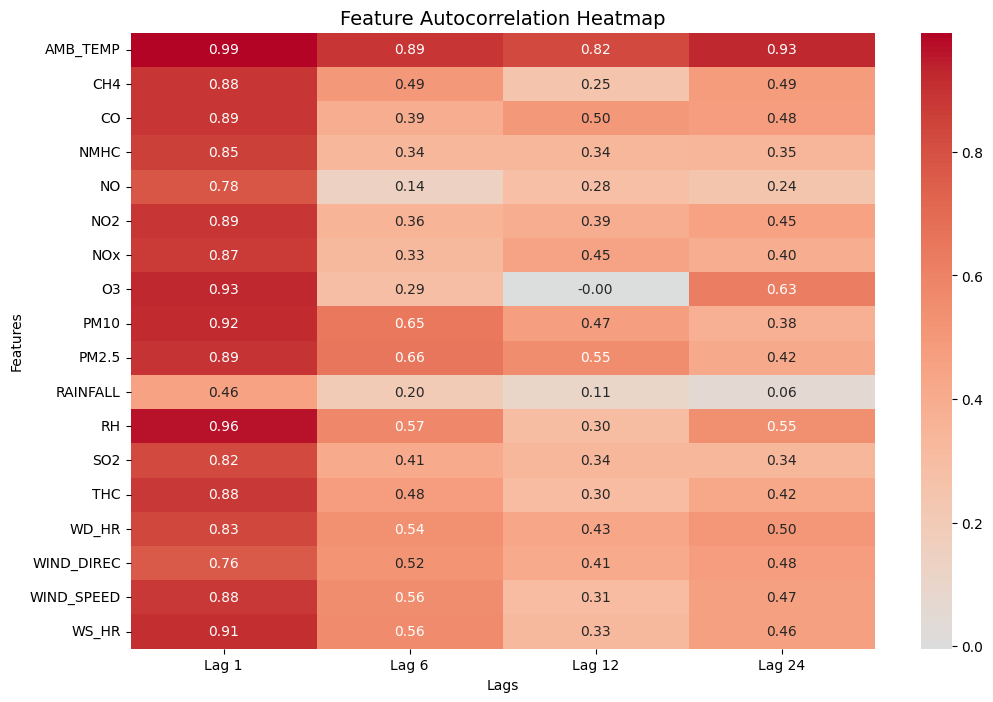

In [ ]:
# Display the autocorrelations as heatmap
lags = [1, 6, 12, 24]
df_autocorr = pd.DataFrame(set_results, index=[f"Lag {l}" for l in lags]).T

plt.figure(figsize=(12, 8))
sns.heatmap(df_autocorr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Feature Autocorrelation Heatmap", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Lags")
plt.show()

# TEST DATA ANALYSIS & VISUALIZATION:

In [ ]:
# Count the outliers for each features
count_outliers = {}
for col in df_train_pivot.columns:
  # Cek if it's a DateTime column
  if col == 'Index' or col == 'Hour':
      continue
  # Remove missing values
  series = df_train_pivot[col].dropna()
  # 1st Quartile
  Q1 = series.quantile(0.25)
  # 3rd Quartile
  Q3 = series.quantile(0.75)
  # Interquartile Range (IQR)
  IQR = Q3 - Q1

  # Lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Less or greater than lower bound
  under_lower = series < lower_bound
  above_upper = series > upper_bound

  # Combine both
  outliers = under_lower | above_upper

  # Count the outliers
  count_outlier = outliers.sum()
  count_outliers[col] = count_outlier

print("Outlier counts:", count_outliers)

Outlier counts: {'DateTime': np.int64(0), 'AMB_TEMP': np.int64(0), 'CH4': np.int64(445), 'CO': np.int64(293), 'NMHC': np.int64(366), 'NO': np.int64(567), 'NO2': np.int64(328), 'NOx': np.int64(408), 'O3': np.int64(66), 'PM10': np.int64(275), 'PM2.5': np.int64(251), 'RAINFALL': np.int64(247), 'RH': np.int64(7), 'SO2': np.int64(167), 'THC': np.int64(327), 'WD_HR': np.int64(0), 'WIND_DIREC': np.int64(0), 'WIND_SPEED': np.int64(35), 'WS_HR': np.int64(15), 'AMB_TEMP_lag1': np.int64(0), 'CH4_lag1': np.int64(444), 'CO_lag1': np.int64(292), 'NMHC_lag1': np.int64(365), 'NO_lag1': np.int64(566), 'NO2_lag1': np.int64(327), 'NOx_lag1': np.int64(407), 'O3_lag1': np.int64(66), 'PM10_lag1': np.int64(275), 'PM2.5_lag1': np.int64(251), 'RH_lag1': np.int64(7), 'SO2_lag1': np.int64(167), 'THC_lag1': np.int64(326), 'WD_HR_lag1': np.int64(0), 'WIND_DIREC_lag1': np.int64(0), 'WIND_SPEED_lag1': np.int64(35), 'WS_HR_lag1': np.int64(15), 'AMB_TEMP_lag6': np.int64(0), 'CH4_lag6': np.int64(439), 'CO_lag6': np.int

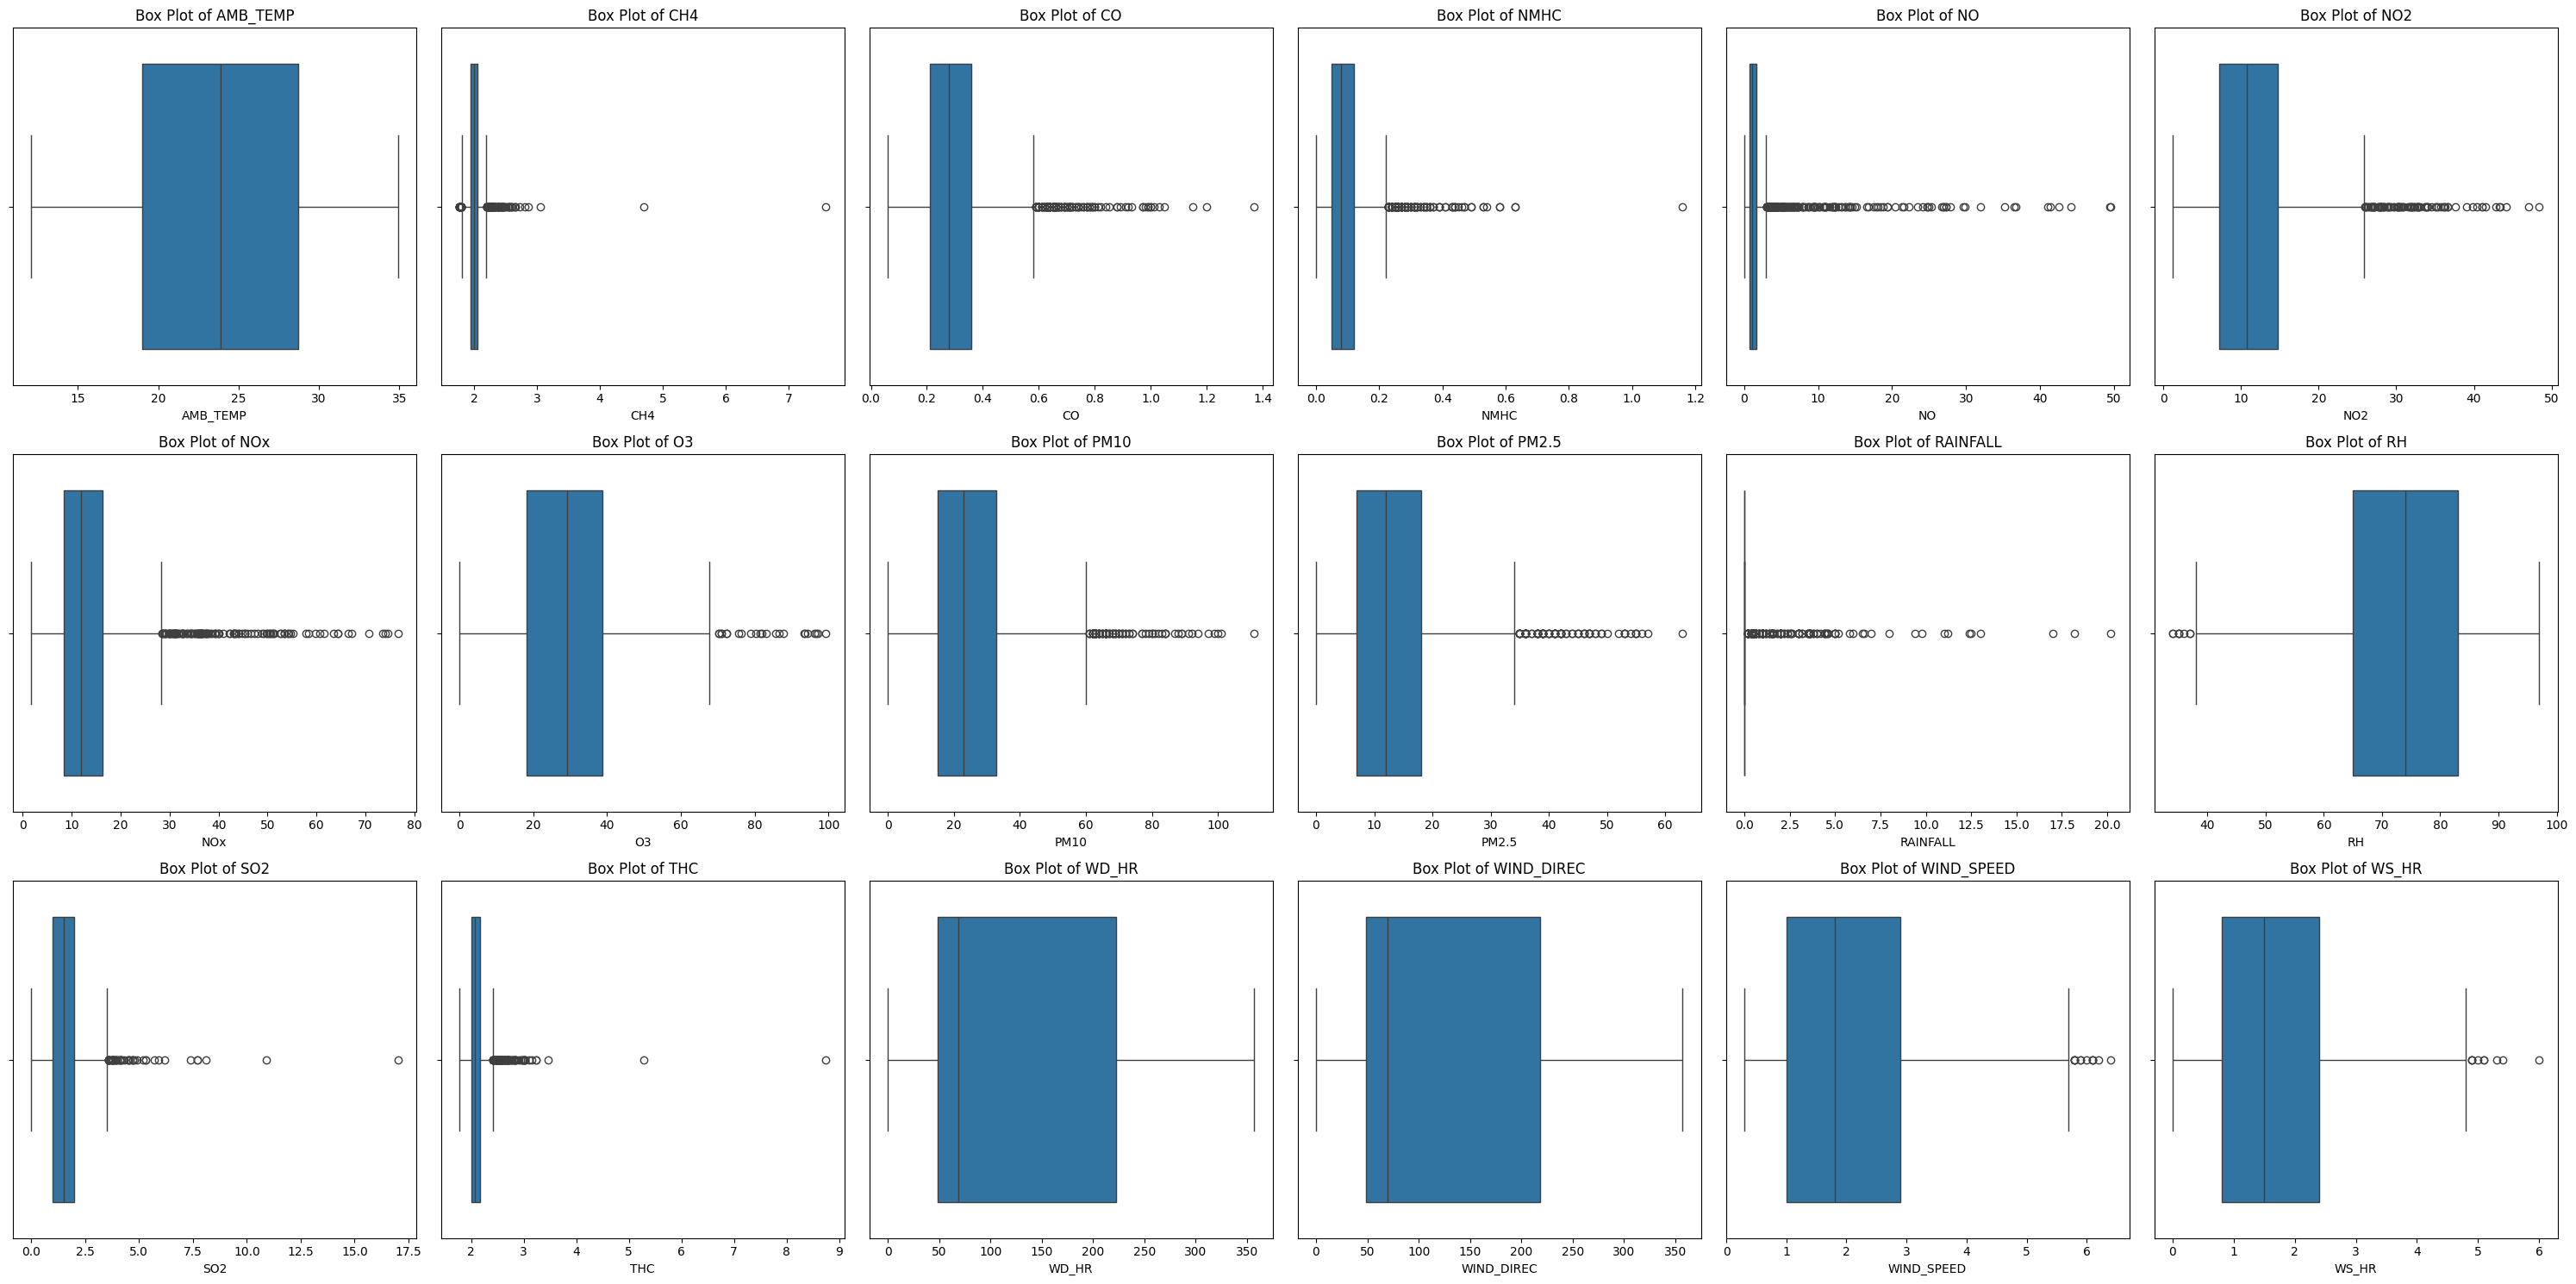

In [ ]:
# Obtain the numerical fields (columns) only
numerical_fields = []
for col in df_test_pivot.columns:
  if col != 'Index' and col != 'Hour':
    numerical_fields.append(col)

plt.figure(figsize=(30, 15))

# Visualize the boxplot
for i, feature in enumerate(numerical_fields):
  plt.subplot(3, 6, i + 1)
  sns.boxplot(x=df_test_pivot[feature])
  plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Finding correlations with Pearson and Spearman method
pearson = df_test_pivot[numerical_fields].corr(method='pearson')[ 'PM2.5' ].drop('PM2.5')
spearman = df_test_pivot[numerical_fields].corr(method='spearman')[ 'PM2.5' ].drop('PM2.5')
print("Pearson correlation with PM2.5:", pearson)
print()
print("Spearman correlation with PM2.5:", spearman)

Pearson correlation with PM2.5: ItemName
AMB_TEMP     -0.323747
CH4           0.287166
CO            0.599958
NMHC          0.422954
NO            0.192549
NO2           0.500001
NOx           0.450141
O3            0.043265
PM10          0.838903
RAINFALL     -0.144808
RH            0.006584
SO2           0.273340
THC           0.355849
WD_HR        -0.000643
WIND_DIREC   -0.011004
WIND_SPEED   -0.133856
WS_HR        -0.129260
Name: PM2.5, dtype: float64

Spearman correlation with PM2.5: ItemName
AMB_TEMP     -0.286782
CH4           0.475223
CO            0.589696
NMHC          0.426268
NO            0.100052
NO2           0.458461
NOx           0.437175
O3            0.041582
PM10          0.827593
RAINFALL     -0.278272
RH           -0.045477
SO2           0.222726
THC           0.505149
WD_HR        -0.041327
WIND_DIREC   -0.047200
WIND_SPEED   -0.181120
WS_HR        -0.172451
Name: PM2.5, dtype: float64


<Figure size 1000x600 with 0 Axes>

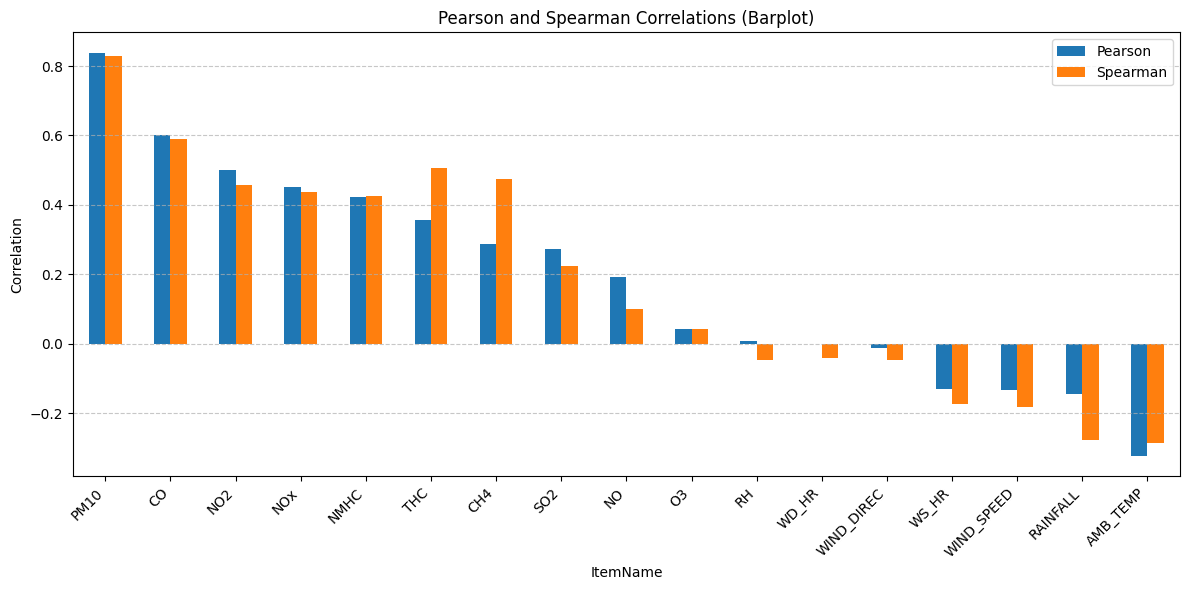

In [ ]:
# Combine correlations into a DataFrame for comparison
df_combined_correlations = pd.DataFrame({
    'Pearson': pearson,
    'Spearman': spearman
}).sort_values('Pearson', ascending=False)

# Plot the barplot, side by side
plt.figure(figsize=(10,6))
df_combined_correlations.plot(kind='bar', figsize=(12,6))
plt.title("Pearson and Spearman Correlations (Barplot)")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

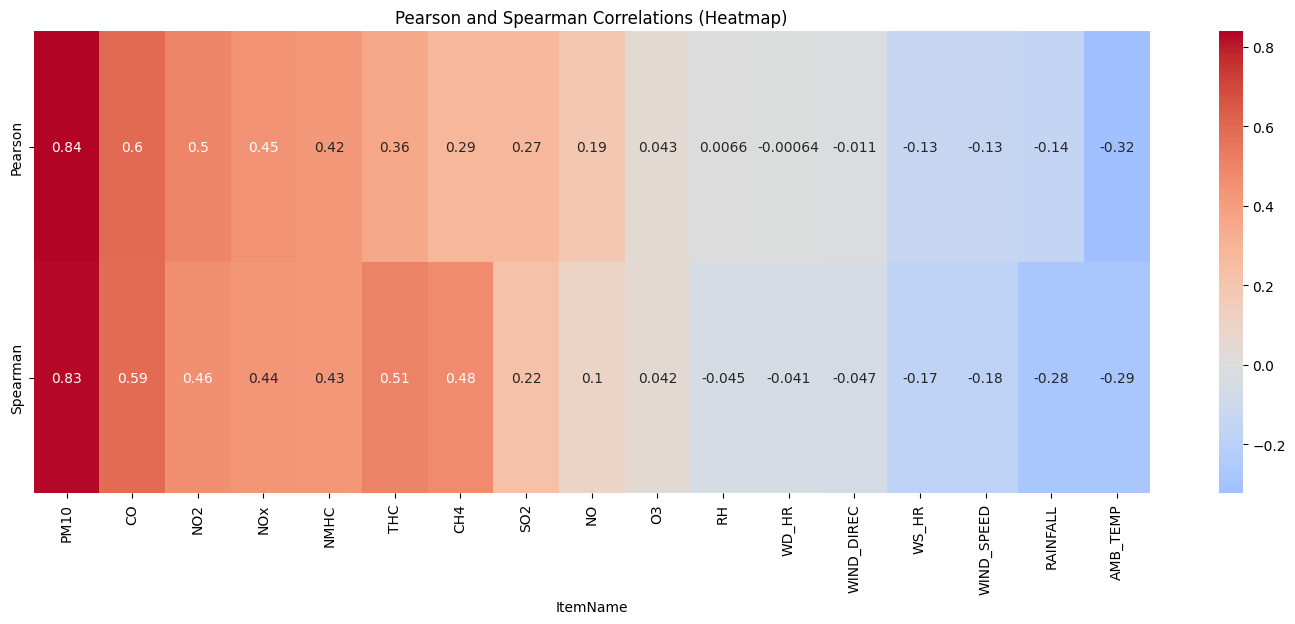

In [ ]:
# Now, display the correlations as heatmap
plt.figure(figsize=(18,6))
sns.heatmap(df_combined_correlations.T, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson and Spearman Correlations (Heatmap)")
plt.show()

In [ ]:
# Calculate Skewness and Kurtosis
count_skew_kurt = {}
for col in numerical_fields:
  # Remove missing values
  series = df_test_pivot[col].dropna().values

  # Calculate mean & std
  mean = np.mean(series)
  std = np.std(series)

  # Calculate skewness, the formula is: the mean of ((x-mean)/std)^3
  skew = np.sum(((series - mean) / std) ** 3) / len(series)

  # Calculate kurtosis, the formula is: the mean of ((x-mean)/std)^4, substract 3 for excess kurtosis
  kurt = np.sum(((series - mean) / std) ** 4) / len(series) - 3

  # Add it to the set
  count_skew_kurt[col] = {'skewness': skew, 'kurtosis': kurt}

print("Skewness and Kurtosis:")
print()
# print(count_skew_kurt)
for col, kind in count_skew_kurt.items():
  skew_val = kind['skewness']
  kurt_val = kind['kurtosis']
  print(f"{col}:")
  print(f"Skewness: np.float64({skew_val}) - Kurtosis: np.float64({kurt_val})")
  print()

Skewness and Kurtosis:

AMB_TEMP:
Skewness: np.float64(-0.12532360034860604) - Kurtosis: np.float64(-1.1702938654249702)

CH4:
Skewness: np.float64(16.107209389793603) - Kurtosis: np.float64(461.9079173083612)

CO:
Skewness: np.float64(1.7276150487372808) - Kurtosis: np.float64(5.0341257705940485)

NMHC:
Skewness: np.float64(2.9962994670546275) - Kurtosis: np.float64(21.011991540164164)

NO:
Skewness: np.float64(6.70299620819719) - Kurtosis: np.float64(54.82466939815256)

NO2:
Skewness: np.float64(1.475866520447915) - Kurtosis: np.float64(3.1700292556001584)

NOx:
Skewness: np.float64(2.6329671516461093) - Kurtosis: np.float64(10.121908350843432)

O3:
Skewness: np.float64(0.5138601519892043) - Kurtosis: np.float64(1.0408913546204017)

PM10:
Skewness: np.float64(1.349641761819242) - Kurtosis: np.float64(2.6616160214760924)

PM2.5:
Skewness: np.float64(1.4168876219610338) - Kurtosis: np.float64(2.5877385496683)

RAINFALL:
Skewness: np.float64(10.07049609073766) - Kurtosis: np.float64(128

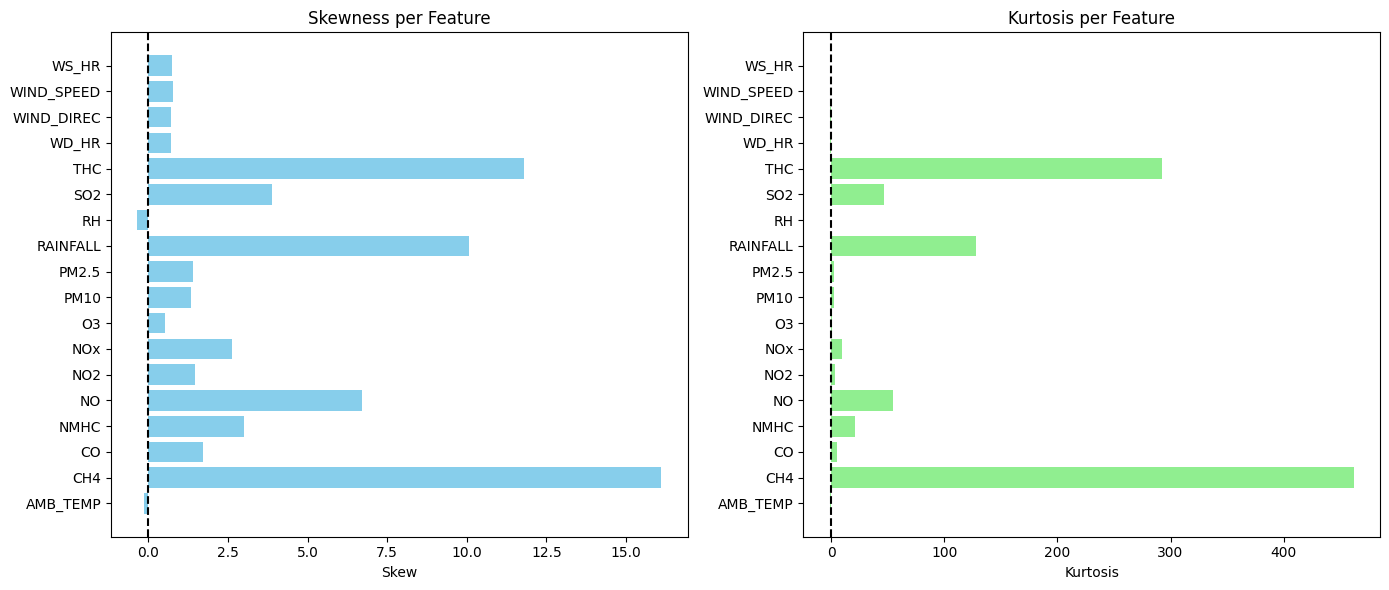

In [ ]:
# Plot the Skewness and Kurtosis
list_skewness = []
list_kurtosis = []
list_features = []

# Iteration through each feature
for feature in count_skew_kurt.keys():
  list_skewness.append(count_skew_kurt[feature]['skewness'])
  list_kurtosis.append(count_skew_kurt[feature]['kurtosis'])
  list_features.append(feature)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Skewness for each feature
axes[0].barh(list_features, list_skewness, color='skyblue')
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title("Skewness per Feature")
axes[0].set_xlabel("Skew")

# Plot Kurtosis for each feature
axes[1].barh(list_features, list_kurtosis, color='lightgreen')
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title("Kurtosis per Feature")
axes[1].set_xlabel("Kurtosis")

plt.tight_layout()
plt.show()

# DATA PREPROCESSING - SCALING & FEATURE ENGINEERING

In [ ]:
# Using RobustScaler to handle outliers
# Reference: https://medium.com/@ebimsv/ml-series-day-47-scaling-and-normalization-073e6a10fa7b
class RobustScaler:
  def __init__(self):
    self.median = None
    self.iqr = None

  def fit(self, X):
    self.median = np.median(X, axis=0)
    q1 = np.percentile(X, 25, axis=0)
    q3 = np.percentile(X, 75, axis=0)
    self.iqr = q3 - q1
    return self

  def transform(self, X):
    return (X - self.median) / self.iqr

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

  def inverse_transform(self, X, col_id=None):
    return X * self.iqr[col_id] + self.median[col_id]

scaler = RobustScaler().fit(df_train_pivot[selected_features])
df_train_scaled = scaler.transform(df_train_pivot[selected_features])
df_train_scaled.head()

ItemName,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,-1.382353,0.2,0.200000,0.333333,0.230769,0.246377,0.226667,-0.401747,0.9375,1.4,-0.263158,0.0,0.2500,-0.223350,-0.153061,0.578947,0.647059
1,-1.372549,0.0,0.000000,0.333333,0.153846,0.028986,0.013333,-0.248908,0.3750,1.3,-0.210526,0.6,0.1250,-0.208122,-0.188776,0.789474,0.529412
2,-1.352941,0.1,0.000000,0.000000,0.153846,-0.057971,-0.080000,-0.227074,0.2500,0.2,-0.315789,0.6,0.0625,-0.167513,-0.204082,0.421053,0.588235
3,-1.343137,0.3,0.333333,0.166667,0.230769,0.275362,0.253333,-0.366812,0.0625,0.3,-0.315789,0.3,0.2500,-0.142132,-0.147959,0.578947,0.588235
4,-1.333333,0.4,0.266667,0.333333,0.153846,0.318841,0.280000,-0.423581,0.3750,0.4,-0.315789,-0.4,0.3750,-0.162437,-0.168367,0.368421,0.352941


In [ ]:
df_test_scaled = scaler.transform(df_test_pivot[selected_features])
df_test_scaled.head()

ItemName,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,-0.686275,4.2,3.266667,3.500000,4.307692,3.000000,3.453333,-1.165939,1.8750,2.4,0.789474,1.3,3.9375,0.294416,0.188776,-0.789474,-0.588235
1,-0.725490,6.2,3.066667,4.333333,7.615385,2.608696,3.666667,-1.257642,1.6875,2.4,0.842105,0.4,5.5000,0.319797,0.163265,-0.736842,-0.647059
2,-0.754902,6.6,2.333333,4.333333,6.461538,2.275362,3.173333,-1.262009,0.8125,1.3,0.842105,0.4,5.7500,0.441624,0.459184,-0.789474,-0.705882
3,-0.754902,8.8,2.133333,4.833333,9.538462,1.826087,3.280000,-1.266376,1.0000,1.7,0.842105,0.4,7.3125,0.482234,0.367347,-0.789474,-0.705882
4,-0.735294,2.6,0.533333,1.666667,1.461538,0.913043,1.040000,-1.021834,0.0000,0.4,0.631579,-0.5,2.2500,0.071066,0.107143,-0.736842,-0.411765


In [ ]:
train_fix = pd.concat([df_train_pivot[["DateTime"]], df_train_scaled.drop(columns=["DateTime"], errors="ignore")], axis=1)
test_fix = pd.concat([df_test_pivot[["Index"]], df_test_pivot[["Hour"]], df_test_scaled.drop(columns=["Index", "Hour"], errors="ignore")], axis=1)

print(train_fix.shape, test_fix.shape)

(5760, 18) (2196, 19)


In [ ]:
train_fix.head()

ItemName,DateTime,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2025-01-01 00:00:00,-1.382353,0.2,0.200000,0.333333,0.230769,0.246377,0.226667,-0.401747,0.9375,1.4,-0.263158,0.0,0.2500,-0.223350,-0.153061,0.578947,0.647059
1,2025-01-01 01:00:00,-1.372549,0.0,0.000000,0.333333,0.153846,0.028986,0.013333,-0.248908,0.3750,1.3,-0.210526,0.6,0.1250,-0.208122,-0.188776,0.789474,0.529412
2,2025-01-01 02:00:00,-1.352941,0.1,0.000000,0.000000,0.153846,-0.057971,-0.080000,-0.227074,0.2500,0.2,-0.315789,0.6,0.0625,-0.167513,-0.204082,0.421053,0.588235
3,2025-01-01 03:00:00,-1.343137,0.3,0.333333,0.166667,0.230769,0.275362,0.253333,-0.366812,0.0625,0.3,-0.315789,0.3,0.2500,-0.142132,-0.147959,0.578947,0.588235
4,2025-01-01 04:00:00,-1.333333,0.4,0.266667,0.333333,0.153846,0.318841,0.280000,-0.423581,0.3750,0.4,-0.315789,-0.4,0.3750,-0.162437,-0.168367,0.368421,0.352941


In [ ]:
test_fix.head()

ItemName,Index,Hour,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,index_0,0,-0.686275,4.2,3.266667,3.500000,4.307692,3.000000,3.453333,-1.165939,1.8750,2.4,0.789474,1.3,3.9375,0.294416,0.188776,-0.789474,-0.588235
1,index_0,1,-0.725490,6.2,3.066667,4.333333,7.615385,2.608696,3.666667,-1.257642,1.6875,2.4,0.842105,0.4,5.5000,0.319797,0.163265,-0.736842,-0.647059
2,index_0,2,-0.754902,6.6,2.333333,4.333333,6.461538,2.275362,3.173333,-1.262009,0.8125,1.3,0.842105,0.4,5.7500,0.441624,0.459184,-0.789474,-0.705882
3,index_0,3,-0.754902,8.8,2.133333,4.833333,9.538462,1.826087,3.280000,-1.266376,1.0000,1.7,0.842105,0.4,7.3125,0.482234,0.367347,-0.789474,-0.705882
4,index_0,4,-0.735294,2.6,0.533333,1.666667,1.461538,0.913043,1.040000,-1.021834,0.0000,0.4,0.631579,-0.5,2.2500,0.071066,0.107143,-0.736842,-0.411765


In [ ]:
# Show the index for each features
print("Selected features:", selected_features)
print()
print("Feature indices:")
for idx, feature_name in enumerate(selected_features):
    print(f"Index {idx}: {feature_name}")

Selected features: ['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']

Feature indices:
Index 0: AMB_TEMP
Index 1: CH4
Index 2: CO
Index 3: NMHC
Index 4: NO
Index 5: NO2
Index 6: NOx
Index 7: O3
Index 8: PM10
Index 9: PM2.5
Index 10: RH
Index 11: SO2
Index 12: THC
Index 13: WD_HR
Index 14: WIND_DIREC
Index 15: WIND_SPEED
Index 16: WS_HR


In [ ]:
# Custom Polynomial Features from scratch
def create_polynomial_features(X, n_features_per_hour=17):
  # Get the number of samples and set the total hours to 9
  n_samples = X.shape[0]
  n_hours = 9

  # Reshape X to separate features by hour
  X_reshaped = X.reshape(n_samples, n_hours, n_features_per_hour)

  # This is the original features
  polynomial_features = [X]

  # Extract PM2.5 across all 9 hours
  pm25_hours = X_reshaped[:, :, 9]

  # Calculate PM2.5 squared to capture non-linear relationships
  pm25_squared = pm25_hours ** 2
  polynomial_features.append(pm25_squared)

  # Calculate PM2.5 hour-to-hour interactions (between hour[i] and hour[i+1])
  pm25_interactions = pm25_hours[:, :-1] * pm25_hours[:, 1:]  # 8 interactions
  polynomial_features.append(pm25_interactions)

  # Calculate the interaction between PM2.5 and RH (Relative Humidity - index 10)
  rh_hours = X_reshaped[:, :, 10]
  pm25_temp = pm25_hours * rh_hours
  polynomial_features.append(pm25_temp)

  # Calculate the recent PM2.5 trend (last 3 hours avg - first 3 hours avg)
  last_3hours_avg = pm25_hours[:, -3:].mean(axis=1, keepdims=True)
  first_3hours_avg = pm25_hours[:, :3].mean(axis=1, keepdims=True)
  pm25_trend = last_3hours_avg - first_3hours_avg
  polynomial_features.append(pm25_trend)

  # Calculate PM2.5 volatility (standard deviation)
  pm25_volatility = pm25_hours.std(axis=1, keepdims=True)
  polynomial_features.append(pm25_volatility)

  # Concatenate all the features (original features + polynomial features)
  X_polynomial = np.hstack(polynomial_features)

  print(f"Original features: {X.shape[1]}, Polynomial features: {X_polynomial.shape[1]}")

  return X_polynomial

# LINEAR REGRESSION ALGORITHM - LAYER & TRAINING

Train features shape: (5751, 153)
Train labels shape: (5751,)
Test features shape: (244, 153)
Original features: 153, Polynomial features: 181
Original features: 153, Polynomial features: 181
X_train shape: (5175, 181)
X_val shape: (576, 181)
Input size (with polynomial features): 181
Epoch 100/10000 - train_rmse: 0.4162 - val_rmse: 0.3614
Epoch 200/10000 - train_rmse: 0.4024 - val_rmse: 0.3535
Epoch 300/10000 - train_rmse: 0.3975 - val_rmse: 0.3504
Epoch 400/10000 - train_rmse: 0.3948 - val_rmse: 0.3495
Epoch 500/10000 - train_rmse: 0.3934 - val_rmse: 0.3485
Epoch 600/10000 - train_rmse: 0.3923 - val_rmse: 0.3489
Epoch 700/10000 - train_rmse: 0.3918 - val_rmse: 0.3481
Epoch 800/10000 - train_rmse: 0.3912 - val_rmse: 0.3478
Epoch 900/10000 - train_rmse: 0.3904 - val_rmse: 0.3484
Epoch 1000/10000 - train_rmse: 0.3901 - val_rmse: 0.3483
Epoch 1100/10000 - train_rmse: 0.3897 - val_rmse: 0.3486
Epoch 1200/10000 - train_rmse: 0.3895 - val_rmse: 0.3487
Epoch 1300/10000 - train_rmse: 0.3893 -

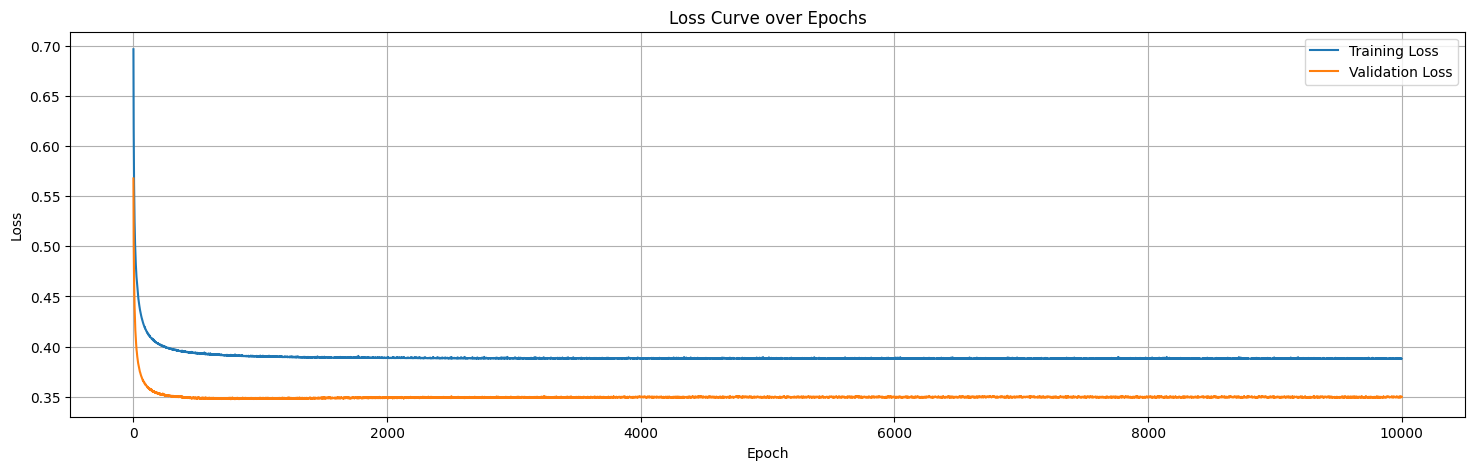


The first 10 predictions:
[[18.84438655]
 [28.79082004]
 [13.48073631]
 [19.10303269]
 [31.41677097]
 [30.06203676]
 [16.38550819]
 [23.95982924]
 [35.81230911]
 [11.95213829]]


In [ ]:
class GradientDescentLayer:
  def __init__(self, input_dim, output_dim, l1=0.0, l2=0.0):
    # Initialize weights & bias
    self.weights = np.random.randn(input_dim, output_dim) * 1e-3
    self.bias = np.zeros((1, output_dim))
    self.l1 = l1
    self.l2 = l2

  def forward_pass(self, X):
    # Linear prediction
    return X @ self.weights + self.bias

  def backward_pass(self, X, y_hat, y_true, rmse):
    # Calculate gradient loss
    gradient_loss = -2 * (y_true - y_hat) / (rmse * len(y_true))

    # Calculate gradients weights
    gradient_weights = X.T @ gradient_loss
    gradient_bias = gradient_loss.sum(axis=0, keepdims=True)

    return gradient_weights / len(y_true), gradient_bias / len(y_true)

  def step_update(self, gradient_weights, gradient_bias, lr):
    # Parameter update with L1 + L2 (Regularization)
    self.weights -= lr * (gradient_weights + self.l1 * np.sign(self.weights) + self.l2 * self.weights)
    self.bias -= lr * (gradient_bias + self.l1 * np.sign(self.bias) + self.l2 * self.bias)

class TrainGradientDescent:
  def __init__(self, input_dim, output_dim, l1=0.0, l2=0.0):
    self.layer = GradientDescentLayer(input_dim, output_dim, l1, l2)

  # Train Gradient Descent
  def fit(self, X, y, X_val, y_val, n_epochs=100, lr=0.01, batch_size=32):
    # Train and Validation lists
    train_history = []
    val_history = []

    for epoch in range(n_epochs):
      # Shuffle the dataset
      y_fixed = y.reshape(-1, 1) if y.ndim == 1 else y
      combined = np.hstack((X, y_fixed))
      np.random.shuffle(combined)
      X_shuf = combined[:, :-y_fixed.shape[1]]
      y_shuf = combined[:, -y_fixed.shape[1]:]

      # Mini-batch loop (not full batch)
      for i in range(0, len(X), batch_size):
        X_batch = X_shuf[i:i + batch_size]
        y_batch = y_shuf[i:i + batch_size]

        # Forward pass
        y_hat = self.layer.forward_pass(X_batch)
        rmse = np.sqrt(((y_batch.reshape(len(y_batch), 1) - y_hat) ** 2).sum() / len(y_batch))

        # Backward pass
        gradient_weights, gradient_bias = self.layer.backward_pass(X_batch, y_hat, y_batch, rmse)

        # Update step
        self.layer.step_update(gradient_weights, gradient_bias, lr)

      # After one epoch, evaluate to get the error/loss
      # Calculate for training
      train_pred = self.predict(X)
      train_loss = np.sqrt(((y.reshape(len(y), 1) - train_pred) ** 2).sum() / len(y))
      train_history.append(train_loss)

      # Calculate for validation
      val_pred = self.predict(X_val)
      val_loss = np.sqrt(((y_val.reshape(len(y_val), 1) - val_pred) ** 2).sum() / len(y_val))
      val_history.append(val_loss)

      # Print the data per 100 epochs
      if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} - train_rmse: {train_loss:.4f} - val_rmse: {val_loss:.4f}")

    return train_history, val_history

  def predict(self, X):
    return self.layer.forward_pass(X)

class RidgeRegression:
  def __init__(self, l2=1.0):
    self.l2 = l2
    self.coef = None
    self.intercept = None

  def fit(self, X, y):
    n, d = X.shape
    X_ext = np.hstack([np.ones((n, 1)), X])
    I = np.eye(d + 1)
    I[0, 0] = 0

    A = X_ext.T @ X_ext + self.l2 * I
    b = X_ext.T @ y
    w = np.linalg.solve(A, b)

    self.intercept = w[0]
    self.coef = w[1:]

  def predict(self, X):
    return X @ self.coef + self.intercept

# Create training features & targets
features_train = []
targets_train = []

# Define the window size (9 previous hours for input + 1 target hour)
window_size = 10

# Sliding window algorithm
for current_index in range(len(train_fix) - window_size + 1):
    current_window = train_fix.iloc[current_index : current_index + window_size]

    # Match original condition: accept if same month OR days are continuous
    month_does_not_change = current_window['DateTime'].dt.month.nunique() <= 1
    days_are_continuous = current_window['DateTime'].dt.day.diff().max() <= 1

    if month_does_not_change or days_are_continuous:
        input_features = current_window.iloc[:-1].drop(columns=['DateTime']).to_numpy().ravel()
        target_value = current_window.iloc[-1]['PM2.5']

        features_train.append(input_features)
        targets_train.append(target_value)

features_train = np.asarray(features_train)
targets_train = np.asarray(targets_train)

print(f"Train features shape: {features_train.shape}")
print(f"Train labels shape: {targets_train.shape}")

# Prepare test set features
features_test = []

test_prepared = test_fix.drop(columns=['Hour', 'Index'])
num_sequences = len(test_prepared) // 9

for test_index in range(num_sequences):
  seq_window = test_prepared[test_fix['Index'] == f'index_{test_index}']
  seq_flattened = seq_window.to_numpy().ravel()
  features_test.append(seq_flattened)

features_test = np.asarray(features_test)

print(f"Test features shape: {features_test.shape}")

features_train_poly = create_polynomial_features(features_train, n_features_per_hour=17)
features_test_poly = create_polynomial_features(features_test, n_features_per_hour=17)

# Split dataset into training and validation sets
split_ratio = 0.9
split_index = int(split_ratio * len(features_train_poly))
X_train, X_val = features_train_poly[:split_index], features_train_poly[split_index:]
y_train, y_val = targets_train[:split_index], targets_train[split_index:]

# Reshape labels
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

# Declare hyperparameters
input_size = X_train.shape[1]
output_size = 1
batch_size = 8
num_epochs = 10000
learning_rate = 5e-5
regularization_rate = 0

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Input size (with polynomial features): {input_size}")

# Choose regression method
reg_method = "GD"

# If-else logic for chosen method
if reg_method == "GD":
  learner = TrainGradientDescent(
    input_dim=input_size,
    output_dim=output_size,
    l1=regularization_rate,
    l2=regularization_rate
  )

  train_err, val_err = learner.fit(
    X_train, y_train, X_val, y_val,
    num_epochs, learning_rate, batch_size
  )

  # Print final training and validation loss
  print(f"Final training loss: {train_err[-1]}")
  print(f"Final validation loss: {val_err[-1]}")
  print()

  # visualize learning curve
  plt.figure(figsize=(18, 5))
  plt.plot(train_err, label="Training Loss", color="#1f77b4")
  plt.plot(val_err, label="Validation Loss", color="#ff7f0e")
  plt.title("Loss Curve over Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Run prediction on test set to do the evaluation
  y_hat = learner.predict(features_test_poly)

elif reg_method == "RR":
  learner = RidgeRegression(l2=10.0)
  learner.fit(X_train, y_train)

  # Predictions
  train_pred_ridge = learner.predict(X_train).reshape(-1, 1)
  val_pred_ridge = learner.predict(X_val).reshape(-1, 1)
  test_pred_ridge = learner.predict(features_test_poly).reshape(-1, 1)

  # RMSE
  train_rmse_ridge = np.sqrt(((y_train - train_pred_ridge) ** 2).mean())
  val_rmse_ridge = np.sqrt(((y_val - val_pred_ridge) ** 2).mean())

  print(f"Ridge - train RMSE: {train_rmse_ridge:.4f}, val RMSE: {val_rmse_ridge:.4f}")

  y_hat = learner.predict(features_test_poly).reshape(-1, 1)

# Inverse scaling (recover original scale because of RobustScaler)
y_hat_rescaled = scaler.inverse_transform(y_hat, col_id=9)
print()
print("The first 10 predictions:")
print(y_hat_rescaled[:10])

# Generate submission index array
submission_idx = np.array([f"index_{i}" for i in range(len(y_hat_rescaled))])

# Combine index with predictions
submission = np.column_stack((submission_idx, y_hat_rescaled))

# Add header row
submission_header = np.array([["index", "answer"]])
submission_with_header = np.vstack((submission_header, submission))

# Save to CSV
np.savetxt(
  "submission.csv",
  submission_with_header[:245, :],
  fmt="%s",
  delimiter=","
)